In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data set link =https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/download?datasetVersionNumber=1

In [2]:
df_anime = pd.read_csv(r'./datasets/anime.csv')
df_ratings = pd.read_csv(r'./datasets/rating.csv')

In [3]:
df_anime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_ratings.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df_ratings.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [9]:
print(df_anime['type'].unique())
print(sorted(df_ratings['rating'].unique()))

['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]
[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [10]:
df_anime.dropna(inplace=True)

In [11]:
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [12]:
df_ratings = df_ratings[df_ratings['rating']!=-1]

In [13]:
df_ratings['rating'].unique()

array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

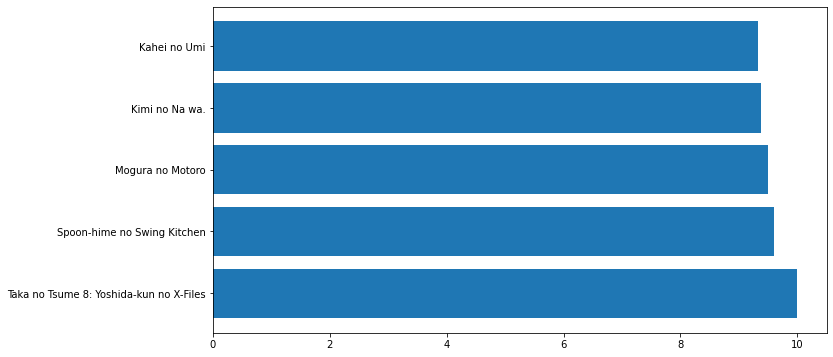

In [14]:
top_5_ratings = df_anime.sort_values(by = 'rating', ascending=False)[:5]
plt.figure(figsize=(11,6))
plt.barh(y = top_5_ratings['name'], width= top_5_ratings['rating'])
plt.show()

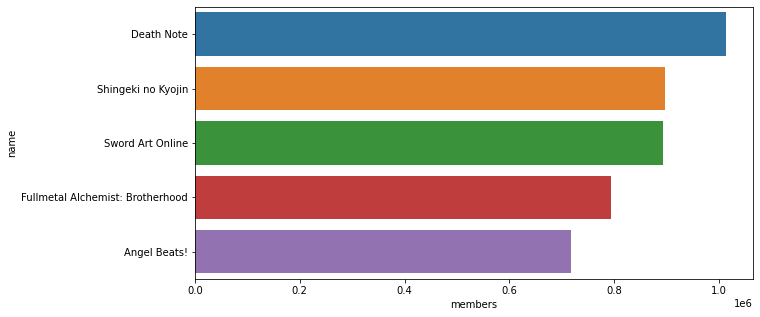

In [15]:
top_5 = df_anime.sort_values(by = 'members',ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(y = top_5['name'], x=top_5['members'], orient='h')
plt.show()

In [16]:
top_5

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


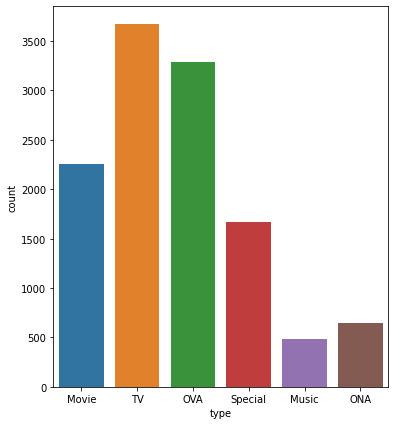

In [17]:
plt.figure(figsize=(6,7))
sns.countplot(x = df_anime['type'])
plt.show()

In [18]:
rating_count = df_ratings.groupby(by='anime_id',as_index=False,).size().rename(columns={'size':'rating_count'})

In [19]:
rating_count

,anime_id,rating_count
0,1,13449
1,5,5790
2,6,9385
3,7,2169
4,8,308
...,...,...
9922,34324,11
9923,34325,15
9924,34349,3
9925,34367,4


In [20]:
merged_rating = pd.merge(df_ratings, rating_count, on='anime_id')

In [21]:
merged_rating

,user_id,anime_id,rating,rating_count
0,1,8074,10,19488
1,3,8074,6,19488
2,5,8074,2,19488
3,12,8074,6,19488
4,14,8074,6,19488
...,...,...,...,...
6337236,69964,23585,7,1
6337237,69964,33659,6,1
6337238,72800,30738,4,1
6337239,73135,8723,5,1


In [22]:
mini_threshold_for_rating = 500
new_merged_rating = merged_rating[merged_rating['rating_count']>mini_threshold_for_rating].rename(columns={'rating':'user_rating'})
new_merged_rating 

,user_id,anime_id,user_rating,rating_count
0,1,8074,10,19488
1,3,8074,6,19488
2,5,8074,2,19488
3,12,8074,6,19488
4,14,8074,6,19488
...,...,...,...,...
6229059,73221,888,8,616
6229060,73250,888,5,616
6229061,73317,888,7,616
6229062,73431,888,9,616


In [23]:
merged_data = pd.merge(df_anime,new_merged_rating,on='anime_id')

In [24]:
merged_data.drop(columns=['rating_count'], inplace=True)

In [25]:
merged_data = merged_data[merged_data['user_id']<50000]
merged_data

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...,...
5738303,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,49480,6
5738304,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,49540,8
5738305,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,49850,10
5738306,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,49857,5


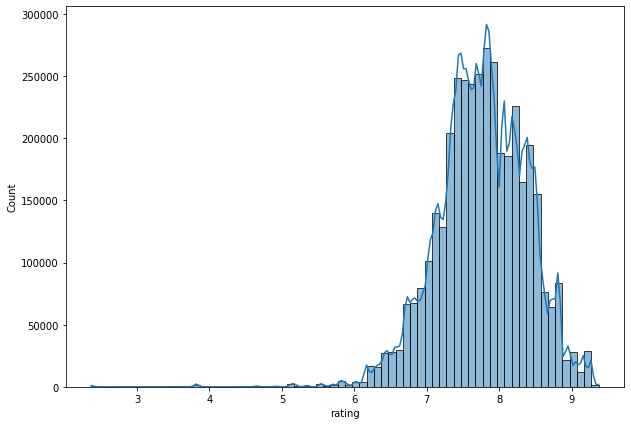

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(merged_data['rating'], bins=70,kde=True)
plt.show()

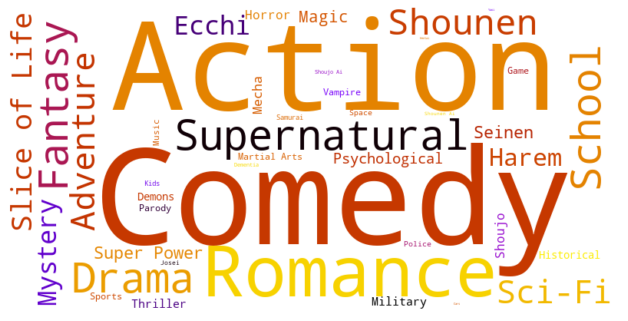

In [27]:
nonull_anime=merged_data.copy()
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.figure(figsize=(11,11))
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text
df_anime['name'] = df_anime['name'].apply(text_cleaning)

In [40]:
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, stop_words='english',ngram_range=(1,3))
genre_str = df_anime['name'].str.split(',').astype('str')
tfv_matrix = tfv.fit_transform(genre_str)

In [31]:
tfv_matrix.shape

(12017, 5418)

In [32]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [33]:
indices = pd.Series(df_anime.index, index = df_anime['name'].str.lower())

In [34]:
indices

name
kimi no na wa.                                            0
fullmetal alchemist: brotherhood                          1
gintama°                                                  2
steins;gate                                               3
gintama                                                   4
                                                      ...  
toushindai my lover: minami tai mecha-minami          12289
under world                                           12290
violence gekiga david no hoshi                        12291
violence gekiga shin david no hoshi: inma densetsu    12292
yasuji no pornorama: yacchimae!!                      12293
Length: 12017, dtype: int64

In [35]:
def get_recommendation(title, top_n, sig = sig):
    title = title.lower()
    anime_id = indices[title]
    sig_score = list(enumerate(sig[anime_id]))
    top10_sig_score = sorted(sig_score, key=lambda x:x[1], reverse=True)[1:top_n+1]
    top10_indices = [x[0] for x in top10_sig_score]
    df1 = pd.DataFrame({"Anime name": df_anime['name'].iloc[top10_indices].values,
                        'Rating': df_anime['rating'].iloc[top10_indices].values })
    return df1

In [36]:
get_recommendation('Gintama: Enchousen',10)

,Anime name,Rating
0,Gintama,9.16
1,Gintama: Enchousen,9.11
2,Gintama,9.04
3,Gintama: Shiroyasha Koutan,8.37
4,Gintama: Yorinuki Gintama-san on Theater 2D,8.60
5,Gintama: Shinyaku Benizakura-hen,8.31
6,Gintama: Dai Hanseikai,8.19
7,Gintama Movie: Shinyaku Benizakura-hen,8.59
8,Gintama x Mameshiba,7.04
9,Gintama°: Aizome Kaori-hen,8.69


In [37]:
import json
with open("index.json",'w') as fp:
    json.dump(indices.to_dict(),fp)

In [38]:
np.save('sig.npy',sig,fix_imports=False, allow_pickle=False)